## Data Extraction and NLP
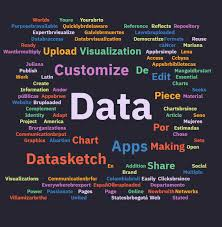
Data Extraction and NLP (Natural Language Processing) are important aspects of analyzing textual data.

Data Extraction refers to the process of collecting, retrieving, and organizing data from various sources. It involves identifying relevant information and transforming it into a structured format for further analysis. Data extraction can involve scraping data from websites, parsing text documents, or extracting data from databases.

NLP, on the other hand, focuses on the interaction between computers and human language. It involves using algorithms and techniques to understand, interpret, and generate human language. NLP tasks include text classification, sentiment analysis, named entity recognition, machine translation, and many others.

NLP utilizes various techniques such as tokenization, part-of-speech tagging, syntactic parsing, semantic analysis, and sentiment analysis to extract meaning and insights from text data. It enables machines to understand and process human language, making it useful for tasks like automated content analysis, information retrieval, and language generation.

By combining data extraction with NLP techniques, analysts can uncover valuable information from large volumes of text data. This can help in understanding customer sentiment, analyzing social media trends, extracting key information from documents, and making informed business decisions.

Overall, data extraction and NLP play crucial roles in transforming unstructured text data into structured information, enabling powerful analysis and insights.

##  I. Importing Nassaries Liabiries

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re


import warnings
warnings.filterwarnings("ignore")

In [2]:
#df = pd.read_excel(r"C:\Users\Dell\Downloads\Project Deep Learning\Input.xlsx")
#df.head()

In [3]:
#url_list = list(df["URL"])

## II. Web scripting:
Web scripting refers to the use of programming languages like Python to automate the collection of text data from websites. It involves techniques like web scraping, using libraries like BeautifulSoup, and interacting with web APIs to extract and process textual information for analysis or other purposes.

In [4]:
data = []

for url in url_list:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    text_data = soup.get_text()
    data.append({'URL': url, 'Text Data': text_data})

In [5]:
# convert to datafram
df_2 = pd.DataFrame(data)

In [6]:
# sove callection in excel format
df_2.to_excel("Text_data1.xlsx",index=False)

In [7]:
## read data
df_2 = pd.read_excel(r"C:\Users\Dell\practice_python_evrhive\may_23\Text_data1.xlsx")
df_2.head(3)

,URL,Text Data
0,https://insights.blackcoffer.com/ai-in-healthc...,\n\n\n \n\nAI in healthcare to Improve Patien...
1,https://insights.blackcoffer.com/what-if-the-c...,\n\n\n \n\nWhat if the Creation is Taking Ove...
2,https://insights.blackcoffer.com/what-jobs-wil...,\n\n\n \n\nWhat Jobs Will Robots Take From Hu...


In [8]:
df_2.shape

(114, 2)

## III. Text preporcessing

In [9]:
## replace some text like \n [^a-zA-Z0-9 ]
df_2["Text Data"] = df_2["Text Data"].str.replace("\n","")
df_2["Text Data"] = df_2["Text Data"].str.replace("[^a-zA-Z0-9 ]","")
df_2["Text Data"] = df_2["Text Data"].str.replace("\xa0"," ")
df_2["Text Data"] = df_2["Text Data"].str.replace("  "," ")

In [10]:
df_2.head(3)

,URL,Text Data
0,https://insights.blackcoffer.com/ai-in-healthc...,AI in healthcare to Improve Patient Outcomes ...
1,https://insights.blackcoffer.com/what-if-the-c...,What if the Creation is Taking Over the Creat...
2,https://insights.blackcoffer.com/what-jobs-wil...,What Jobs Will Robots Take From Humans in The...


## i). Sentimental Analysis

In [11]:
from textblob import TextBlob

# Define a function to calculate sentiment polarity and subjectivity using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

# Apply the sentiment analysis function to the 'Text' column and create new columns for polarity and subjectivity
df_2[['polarity', 'Subjectivity']] = df_2['Text Data'].apply(get_sentiment).apply(pd.Series)

# Categorize sentiments based on polarity
df_2['Sentiment'] = df_2['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


## ii). Cleaning using Stop Words Lists

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the stop words list
nltk.download('stopwords')

# Retrieve the English stop words list
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from the text
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Apply the remove_stopwords function to the 'Text' column
df_2['Cleaned Text'] = df_2['Text Data'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## iii). Creating dictionary of Positive and Negative words

In [13]:
# Create a list of positive and negative words
positive_words = ['good', 'happy', 'excellent', 'wonderful']
negative_words = ['bad', 'sad', 'terrible', 'awful']

# Define functions to count positive and negative words in a text
def count_positive_words(text):
    words = text.lower().split()
    positive_count = sum(word in positive_words for word in words)
    return positive_count

def count_negative_words(text):
    words = text.lower().split()
    negative_count = sum(word in negative_words for word in words)
    return negative_count

# Apply the word counting functions to the 'Text' column
df_2['Positive Word Count'] = df_2['Text Data'].apply(count_positive_words)
df_2['Negative Word Count'] = df_2['Text Data'].apply(count_negative_words)

## iv). Extracting Derived variables

In [14]:
import re

# Define a function to extract derived variables
def extract_variables(text):
    # Example: Extracting numbers and email addresses
    numbers = re.findall(r'\d+', text)
    email_addresses = re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', text)
    
    return {
        'Numbers': numbers,
        'Email Addresses': email_addresses
    }

# Apply the extract_variables function to the 'Text' column
df_2['Derived Variables'] = df_2['Text Data'].apply(extract_variables)

## v). Analysis of Readability

In [15]:
import textstat

# Define a function to calculate the Flesch-Kincaid readability index
def calculate_readability(text):
    return textstat.flesch_kincaid_grade(text)

# Apply the calculate_readability function to the 'Text' column
df_2['Readability'] = df_2['Text Data'].apply(calculate_readability)

## vi). Average Number of Words Per Sentence

In [16]:
# Download the necessary nltk resources
nltk.download('punkt')

# Define a function to calculate the average number of words per sentence
def calculate_avg_words_per_sentence(text):
    sentences = nltk.sent_tokenize(text)
    total_words = 0
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        total_words += len(words)
    if len(sentences) > 0:
        return total_words / len(sentences)
    else:
        return 0

# Apply the calculate_avg_words_per_sentence function to the 'Text' column
df_2['Avg Words Per Sentence'] = df_2['Text Data'].apply(calculate_avg_words_per_sentence)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## vii). Complex Word Count

In [17]:

# Download the necessary nltk resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Define a function to calculate the count of complex words
def calculate_complex_word_count(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    complex_word_count = 0
    for token, pos in tagged_tokens:
        if pos.startswith('J') or pos.startswith('V') or pos.startswith('R') or pos.startswith('N'):
            complex_word_count += 1
    return complex_word_count

# Apply the calculate_complex_word_count function to the 'Text' column
df_2['Complex Word Count'] = df_2['Text Data'].apply(calculate_complex_word_count)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## viii). Word Count

In [18]:

# Define a function to calculate the word count
def calculate_word_count(text):
    words = text.split()
    return len(words)

# Apply the calculate_word_count function to the 'Text' column
df_2['Word Count'] = df_2['Text Data'].apply(calculate_word_count)


## ix). Syllable Count Per Word

In [19]:
# Download the necessary nltk resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('cmudict')

# Load the CMU Pronouncing Dictionary
prondict = nltk.corpus.cmudict.dict()

# Define a function to calculate the syllable count per word
def calculate_syllable_count(text):
    tokens = nltk.word_tokenize(text)
    syllable_count = 0
    for token in tokens:
        if token.lower() in prondict:
            syllables = [len(list(y for y in x if y[-1].isdigit())) for x in prondict[token.lower()]]
            syllable_count += max(syllables)
    return syllable_count

# Apply the calculate_syllable_count function to the 'Text' column
df_2['Syllable Count Per Word'] = df_2['Text Data'].apply(calculate_syllable_count)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


## x). Personal Pronouns

In [20]:
import re
# Assume you have a DataFrame called 'df' with a 'Text' column containing the text data

# Define a regular expression pattern to match personal pronouns
pattern = r'\b(I|me|my|mine|myself|you|your|yours|yourself|he|him|his|himself|she|her|hers|herself|it|its|itself|we|us|our|ours|ourselves|you|your|yours|yourselves|they|them|their|theirs|themselves)\b'

# Define a function to extract personal pronouns from text
def extract_personal_pronouns(text):
    pronouns = re.findall(pattern, text, flags=re.IGNORECASE)
    return pronouns

# Apply the extract_personal_pronouns function to the 'Text' column
df_2['Personal Pronouns'] = df_2['Text Data'].apply(extract_personal_pronouns)

## xi).  Average Word Length	

In [21]:
# Define a function to calculate the average word length
def calculate_average_word_length(text):
    words = text.split()
    total_length = sum(len(word) for word in words)
    average_length = total_length / len(words) if len(words) > 0 else 0
    return average_length

# Apply the calculate_average_word_length function to the 'Text' column
df_2['Average Word Length'] = df_2['Text Data'].apply(calculate_average_word_length)


# xii). POSITIVE SCORE

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to calculate the positive and negative scores
def calculate_sentiment_scores(text):
    sentiment_scores = sia.polarity_scores(text)
    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']
    return positive_score, negative_score

# Apply the calculate_sentiment_scores function to the 'Text' column
df_2[['Positive Score', 'Negative Score']] = df_2['Text Data'].apply(calculate_sentiment_scores).apply(pd.Series)


## xiii).  AVG SENTENCE LENGTH

In [23]:
# Download the necessary nltk resources
nltk.download('punkt')

# Define a function to calculate the average sentence length
def calculate_average_sentence_length(text):
    sentences = nltk.sent_tokenize(text)
    total_words = sum(len(nltk.word_tokenize(sentence)) for sentence in sentences)
    average_length = total_words / len(sentences) if len(sentences) > 0 else 0
    return average_length

# Apply the calculate_average_sentence_length function to the 'Text' column
df_2['Average Sentence Length'] = df_2['Text Data'].apply(calculate_average_sentence_length)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# xiv).  PERCENTAGE OF COMPLEX WORDS

In [24]:

# Download the necessary nltk resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Define a function to calculate the percentage of complex words
def calculate_percentage_complex_words(text):
    words = nltk.word_tokenize(text)
    tagged_words = nltk.pos_tag(words)
    complex_word_count = sum(1 for word, tag in tagged_words if tag in ['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS'])
    percentage_complex_words = (complex_word_count / len(words)) * 100 if len(words) > 0 else 0
    return percentage_complex_words

# Apply the calculate_percentage_complex_words function to the 'Text' column
df_2['Percentage of Complex Words'] = df_2['Text Data'].apply(calculate_percentage_complex_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## xv). FOG INDEX

In [25]:

# Download the necessary nltk resources
nltk.download('punkt')
nltk.download('cmudict')

# Load the CMU Pronouncing Dictionary for syllable counting
cmu_dict = nltk.corpus.cmudict.dict()

# Define a function to count the number of syllables in a word
def count_syllables(word):
    if word.lower() in cmu_dict:
        return max([len(list(y for y in x if y[-1].isdigit())) for x in cmu_dict[word.lower()]])
    else:
        return 0

# Define a function to calculate the FOG index
def calculate_fog_index(text):
    words = nltk.word_tokenize(text)
    sentences = nltk.sent_tokenize(text)
    total_words = len(words)
    total_sentences = len(sentences)
    complex_word_count = sum(1 for word in words if count_syllables(word) >= 3)
    fog_index = 0.4 * ((total_words / total_sentences) + (100 * (complex_word_count / total_words)))
    return fog_index

# Apply the calculate_fog_index function to the 'Text' column
df_2['FOG Index'] = df_2['Text Data'].apply(calculate_fog_index)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [26]:
df_2.head()

,URL,Text Data,polarity,Subjectivity,Sentiment,Cleaned Text,Positive Word Count,Negative Word Count,Derived Variables,Readability,...,Complex Word Count,Word Count,Syllable Count Per Word,Personal Pronouns,Average Word Length,Positive Score,Negative Score,Average Sentence Length,Percentage of Complex Words,FOG Index
0,https://insights.blackcoffer.com/ai-in-healthc...,AI in healthcare to Improve Patient Outcomes ...,0.155303,0.436179,Positive,AI healthcare Improve Patient Outcomes Blackco...,0,0,"{'Numbers': ['27', '2023', '31', '2022', '31',...",980.7,...,1652,2497,3829,"[We, We, your, your, your, your, your, your, O...",6.309171,0.136,0.032,2498.0,11.248999,1006.453803
1,https://insights.blackcoffer.com/what-if-the-c...,What if the Creation is Taking Over the Creat...,0.124508,0.401328,Positive,Creation Taking Creator Blackcoffer InsightsSi...,2,0,"{'Numbers': ['27', '2023', '31', '2022', '31',...",836.7,...,1332,2134,2945,"[We, We, your, your, your, your, your, your, O...",5.768041,0.131,0.050,2134.0,9.981256,858.754639
2,https://insights.blackcoffer.com/what-jobs-wil...,What Jobs Will Robots Take From Humans in The...,0.135065,0.442525,Positive,Jobs Robots Take Humans Future Blackcoffer Ins...,1,0,"{'Numbers': ['27', '2023', '31', '2022', '31',...",947.9,...,1559,2413,3727,"[We, We, your, your, your, your, your, your, O...",6.087443,0.084,0.026,2414.0,9.942005,972.774814
3,https://insights.blackcoffer.com/will-machine-...,Will Machine Replace The Human in the Future ...,0.157450,0.451099,Positive,Machine Replace Human Future Work Blackcoffer ...,1,1,"{'Numbers': ['27', '2023', '31', '2022', '31',...",922.9,...,1492,2352,3350,"[We, We, your, your, your, your, your, your, O...",5.713861,0.127,0.023,2355.0,12.101911,947.418259
4,https://insights.blackcoffer.com/will-ai-repla...,Will AI Replace Us or Work With Us Blackcoffe...,0.078938,0.474399,Positive,AI Replace Us Work Us Blackcoffer InsightsSign...,0,0,"{'Numbers': ['27', '2023', '31', '2022', '31',...",958.4,...,1517,2443,3512,"[Us, Us, We, We, your, your, your, your, your,...",5.864511,0.133,0.040,2445.0,10.429448,984.167689


In [27]:
df_2.columns

Index(['URL', 'Text Data', 'polarity', 'Subjectivity', 'Sentiment',
       'Cleaned Text', 'Positive Word Count', 'Negative Word Count',
       'Derived Variables', 'Readability', 'Avg Words Per Sentence',
       'Complex Word Count', 'Word Count', 'Syllable Count Per Word',
       'Personal Pronouns', 'Average Word Length', 'Positive Score',
       'Negative Score', 'Average Sentence Length',
       'Percentage of Complex Words', 'FOG Index'],
      dtype='object')

In [28]:
final = ['URL', 'Text Data','Positive Score','Negative Score','polarity', 'Subjectivity','Average Sentence Length',
        'Percentage of Complex Words', 'FOG Index','Avg Words Per Sentence','Complex Word Count', 'Word Count',
        'Syllable Count Per Word','Personal Pronouns','Average Word Length']
final_output = df_2[final]

## xvi). Output dataset

In [29]:
final_output.head()

,URL,Text Data,Positive Score,Negative Score,polarity,Subjectivity,Average Sentence Length,Percentage of Complex Words,FOG Index,Avg Words Per Sentence,Complex Word Count,Word Count,Syllable Count Per Word,Personal Pronouns,Average Word Length
0,https://insights.blackcoffer.com/ai-in-healthc...,AI in healthcare to Improve Patient Outcomes ...,0.136,0.032,0.155303,0.436179,2498.0,11.248999,1006.453803,2498.0,1652,2497,3829,"[We, We, your, your, your, your, your, your, O...",6.309171
1,https://insights.blackcoffer.com/what-if-the-c...,What if the Creation is Taking Over the Creat...,0.131,0.050,0.124508,0.401328,2134.0,9.981256,858.754639,2134.0,1332,2134,2945,"[We, We, your, your, your, your, your, your, O...",5.768041
2,https://insights.blackcoffer.com/what-jobs-wil...,What Jobs Will Robots Take From Humans in The...,0.084,0.026,0.135065,0.442525,2414.0,9.942005,972.774814,2414.0,1559,2413,3727,"[We, We, your, your, your, your, your, your, O...",6.087443
3,https://insights.blackcoffer.com/will-machine-...,Will Machine Replace The Human in the Future ...,0.127,0.023,0.157450,0.451099,2355.0,12.101911,947.418259,2355.0,1492,2352,3350,"[We, We, your, your, your, your, your, your, O...",5.713861
4,https://insights.blackcoffer.com/will-ai-repla...,Will AI Replace Us or Work With Us Blackcoffe...,0.133,0.040,0.078938,0.474399,2445.0,10.429448,984.167689,2445.0,1517,2443,3512,"[Us, Us, We, We, your, your, your, your, your,...",5.864511


In [30]:
#final_output.to_csv("Final_output.csv")